In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
import warnings

warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('car_evaluation.csv', header=None)

In [4]:
# view dimensions of dataset

df.shape

(1728, 7)

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

In [12]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_predicted, y_test_predicted = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [14]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [16]:
# import category encoders

import category_encoders as ce
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()



,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [17]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [18]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train_predicted)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_predicted, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


In [19]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train_predicted)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_predicted, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train_predicted)

RandomForestClassifier(random_state=0)

In [21]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

In [30]:
feature_scores.index

Index(['safety', 'persons', 'buying', 'maint', 'lug_boot', 'doors'], dtype='object')

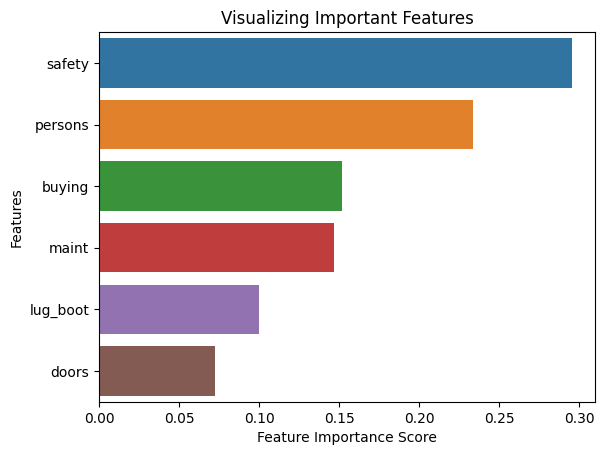

In [22]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [23]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [24]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_predicted, y_test_predicted_predicted_predicted = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [25]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [26]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train_predicted)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test_predicted_predicted_predicted, y_pred)))

Model accuracy score with doors variable removed : 0.9264


In [27]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_predicted, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_predicted_predicted_predicted, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



In [29]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='RdYlBu')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Forest Classifier - Decision Boundaries')
plt.show()

NameError: name 'xx' is not defined

<Figure size 800x600 with 0 Axes>